# NLTK

In [1]:
import nltk
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""

tokens = nltk.word_tokenize(sentence)

tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 '...',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [4]:
help(nltk.download)

Help on method download in module nltk.downloader:

download(info_or_id=None, download_dir=None, quiet=False, force=False, prefix='[nltk_data] ', halt_on_error=True, raise_on_error=False, print_error_to=<ipykernel.iostream.OutStream object at 0x0000018BA607FE08>) method of nltk.downloader.Downloader instance



In [4]:
nltk_data = r"D:\Users\admin\anaconda3\envs\myenv\nltk_data"
nltk.download('averaged_perceptron_tagger', download_dir = nltk_data)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
tagged = nltk.pos_tag(tokens)

tagged[0:6]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [14]:
#nltk.download('maxent_ne_chunker',nltk_data)
nltk.download('words',nltk_data)

[nltk_data] Downloading package words to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [19]:
!pip install svgling

     ---------------------------------------- 67.1/67.1 KB 1.2 MB/s eta 0:00:00


You should consider upgrading via the 'd:\Users\admin\anaconda3\envs\myenv\python.exe -m pip install --upgrade pip' command.


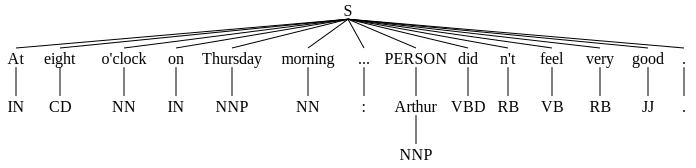

In [20]:
#Identify named entities:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [21]:
# Display a parse tree:

from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

In [5]:
nltk.download('city_database',nltk_data)

[nltk_data] Downloading package city_database to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\city_database.zip.


True

In [97]:
import nltk
from nltk.sem import chat80

q = "SELECT City, Population FROM city_table WHERE Country = 'us' and Population > 1000"
for answer in chat80.sql_query('corpora/city_database/city.db', q):
    print("%-10s %4s" % answer)

In [11]:
nltk.download('chat80', nltk_data)

[nltk_data] Downloading package chat80 to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\chat80.zip.


True

In [12]:
schema = ['city', 'country', 'population']
concepts = chat80.clause2concepts('cities.pl', 'city', schema)

for c in concepts:
    print("%s:\n\t%s" % (c.prefLabel, c.extension[:4]))


city:
	['athens', 'bangkok', 'barcelona', 'berlin']
country_of:
	[('athens', 'greece'), ('bangkok', 'thailand'), ('barcelona', 'spain'), ('berlin', 'east_germany')]
population_of:
	[('athens', '1368'), ('bangkok', '1178'), ('barcelona', '1280'), ('berlin', '3481')]


# Classification

In [ ]:
# https://www.nltk.org/book/ch06.html

In [14]:
nltk.download('names',nltk_data)

[nltk_data] Downloading package names to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

In [15]:
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)

In [19]:
def gender_features(word):
   return {'last_letter': word[-1]}

{'last_letter': 'k'}

In [20]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [22]:
classifier.classify(gender_features('Neo'))

'male'

In [23]:
classifier.classify(gender_features('Trinity'))

'female'

In [25]:
classifier.classify(gender_features('Adam'))

'male'

In [26]:
print(nltk.classify.accuracy(classifier, test_set))

0.746


# Document Classification

In [29]:
nltk.download('movie_reviews', nltk_data)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


True

In [30]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [33]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000] [1]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [36]:
#print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

In [35]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [38]:
print(nltk.classify.accuracy(classifier, test_set))

0.54


In [39]:
classifier.show_most_informative_features(5)

Most Informative Features
             contains(h) = True              pos : neg    =      1.9 : 1.0
             contains(t) = False             pos : neg    =      1.6 : 1.0
             contains(t) = True              neg : pos    =      1.1 : 1.0
             contains(e) = True              neg : pos    =      1.0 : 1.0
             contains(h) = False             neg : pos    =      1.0 : 1.0


# Sentence Segmentation

In [41]:
sents = nltk.corpus.treebank_raw.sents()
tokens = []
boundaries = set()
offset = 0
for sent in sents:
     tokens.extend(sent)
     offset += len(sent)
     boundaries.add(offset-1)

In [42]:
def punct_features(tokens, i):
     return {'next-word-capitalized': tokens[i+1][0].isupper(),
             'prev-word': tokens[i-1].lower(),
             'punct': tokens[i],
             'prev-word-is-one-char': len(tokens[i-1]) == 1}

In [43]:
featuresets = [(punct_features(tokens, i), (i in boundaries))
                for i in range(1, len(tokens)-1)
                if tokens[i] in '.?!']

In [44]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.9461279461279462

In [45]:
train_set

[({'next-word-capitalized': True,
   'prev-word': 'popular',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capitalized': True,
   'prev-word': 'crash',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capitalized': True,
   'prev-word': 'publicly',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capitalized': True,
   'prev-word': 'london',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capitalized': False,
   'prev-word': 'assets',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capitalized': True,
   'prev-word': 'york',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capitalized': True,
   'prev-word': 'competition',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capitalized': True,
   'prev-word': 'sell',
   'punct': '.',
   'prev-word-is-one-char': False},
  True),
 ({'next-word-capita

In [46]:
nltk.download("stopwords", nltk_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

#### https://realpython.com/nltk-nlp-python/

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))

In [52]:
worf_quote = "Sir, I protest. I am not a merry man!"

words_in_quote = word_tokenize(worf_quote)

words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [53]:
filtered_list = []
for word in words_in_quote:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

# Stemming

In [55]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [56]:
stemmer = PorterStemmer()

string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

words = word_tokenize(string_for_stemming)

stemmed_words = [stemmer.stem(word) for word in words]

stemmed_words

['...',
 'the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 '...',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

# Lemmatizing

In [62]:
# nltk.download('wordnet', nltk_data)
nltk.download('omw-1.4', nltk_data)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [63]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

string_for_lemmatizing = "The friends of DeSoto love scarves."
words = word_tokenize(string_for_lemmatizing)

lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

In [65]:
lemmatizer.lemmatize("worst", pos="a")

'worst'

In [66]:
help(lemmatizer.lemmatize)

Help on method lemmatize in module nltk.stem.wordnet:

lemmatize(word: str, pos: str = 'n') -> str method of nltk.stem.wordnet.WordNetLemmatizer instance
    Lemmatize `word` using WordNet's built-in morphy function.
    Returns the input word unchanged if it cannot be found in WordNet.
    
    :param word: The input word to lemmatize.
    :type word: str
    :param pos: The Part Of Speech tag. Valid options are `"n"` for nouns,
        `"v"` for verbs, `"a"` for adjectives, `"r"` for adverbs and `"s"`
        for satellite adjectives.
    :param pos: str
    :return: The lemma of `word`, for the given `pos`.



# Tagging Parts of Speech

In [57]:
sagan_quote = """
... If you wish to make an apple pie from scratch,
... you must first invent the universe."""

words_in_sagan_quote = word_tokenize(sagan_quote)

import nltk
nltk.pos_tag(words_in_sagan_quote)

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

# Using Named Entity Recognition (NER)

In [69]:
# nltk.download("averaged_perceptron_tagger", nltk_data)

lotr_quote = "It's a dangerous business, Frodo, going out your door."
words_in_lotr_quote = word_tokenize(lotr_quote)
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)

In [70]:
nltk.download("maxent_ne_chunker", nltk_data)
nltk.download("words", nltk_data)
tree = nltk.ne_chunk(lotr_pos_tags)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [73]:
quote = """
... Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
... for countless centuries Mars has been the star of war—but failed to
... interpret the fluctuating appearances of the markings they mapped so well.
... All that time the Martians must have been getting ready.
...
... During the opposition of 1894 a great light was seen on the illuminated
... part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
... and then by other observers. English readers heard of it first in the
... issue of Nature dated August 2."""

In [76]:
language = 'english'
def extract_ne(quote):
     words = word_tokenize(quote, language=language)
     tags = nltk.pos_tag(words)
     tree = nltk.ne_chunk(tags, binary=True)
     return set(
         " ".join(i[0] for i in t)
         for t in tree
         if hasattr(t, "label") and t.label() == "NE"
     )

In [77]:
extract_ne(quote)

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}

# Getting Text to Analyze

In [78]:
nltk.download("book", nltk_data)
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     D:\Users\admin\anaconda3\envs\myenv\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     D:\Users\admin\anaconda3\envs\m

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [79]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


In [80]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [84]:
text3.concordance('adam')

Displaying 18 of 18 matches:
l of the air ; and brought them unto Adam to see what he would call th and wha
what he would call th and whatsoever Adam called every living creature , that 
re , that was the name thereof . And Adam gave names to all cattle , and to th
o every beast of the field ; but for Adam there was not found an help meet for
God caused a deep sleep to fall upon Adam , and he sle and he took one of his 
, and brought her unto the man . And Adam said , This is now bone of my bones 
 the garden in the cool of the d and Adam and his wife hid themselves from the
arden . And the LORD God called unto Adam , and said unto him , Where art thou
d he shall rule over thee . And unto Adam he said , Because thou hast hearkene
nd unto dust shalt thou return . And Adam called his wife ' s name Eve ; becau
 was the mother of all living . Unto Adam also and to his wife did the LORD Go
ep the way of the tree of life . And Adam knew Eve his wife ; and she conceive
y Lamech seventy and se

In [86]:
text7.concordance('usa')

Displaying 1 of 1 matches:
MCA or the YWCA or Catholic Charities USA or a hundred other nonprofit organiza


# Making a Dispersion Plot

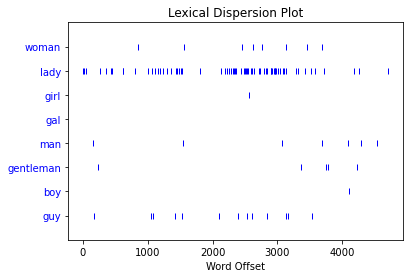

In [87]:
text8.dispersion_plot(
     ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"] )

# Making a Frequency Distribution

In [89]:
from nltk import FreqDist

frequency_distribution = FreqDist(text8)
frequency_distribution

FreqDist({',': 539, '.': 353, '/': 110, 'for': 99, 'and': 74, 'to': 74, 'lady': 68, '-': 66, 'seeks': 60, 'a': 52, ...})

In [90]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [91]:
weaningful_words = [
     word for word in text8 if word.casefold() not in stop_words
 ]

In [94]:
frequency_distribution = FreqDist(weaningful_words)
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

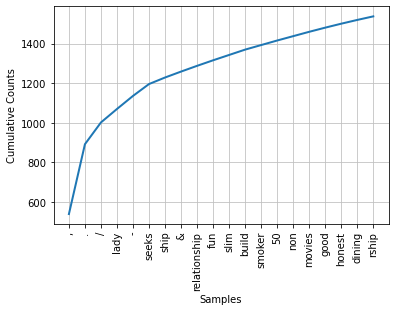

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [95]:
frequency_distribution.plot(20, cumulative=True)

# CRFTagger

In [2]:
from nltk.tag import CRFTagger
ct = CRFTagger()

NameError: name 'pycrfsuite' is not defined

In [ ]:
ct.train(train_data,'model.crf.tagger')
ct.tag_sents([['dog','is','good'], ['Cat','eat','meat']])

In [2]:
import json
json_file ='intents.json'
with open(json_file,'r') as f:
    data = json.load(f)

In [3]:
import pandas as pd
df = pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [4]:
df['patterns'] = df['patterns'].apply(', '.join) 

In [ ]:
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('omw-1.4')

In [5]:
from nltk.corpus import stopwords
import string
from textblob import Word
stop = stopwords.words('english')
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in x.split() if x not in string.punctuation))

                                      
df['patterns'] = df['patterns'].str.replace('[^\w\s]','')
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in x.split() if  not x.isdigit()))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in x.split() if not x in stop))

df['patterns'] = df['patterns'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

d:\Users\admin\anaconda3\envs\sanskrit\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thanks helping thank guidance thats helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hour open tell opening time open timing please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay using credit card pay using mastercard pay...,"[We accept VISA, Mastercard and credit card, W..."
